In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("../errortools/")
import errortools
import scipy.stats
import pandas as pd
import sklearn.preprocessing

import matplotlib

SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 28

matplotlib.rc('font', size=MEDIUM_SIZE)         # controls default text sizes
matplotlib.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
matplotlib.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=SMALL_SIZE)   # legend fontsize
matplotlib.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

matplotlib.rcParams['font.family'] = 'serif'

from IPython.display import Markdown, display
def Print(string):
    display(Markdown(string))
    
np.random.seed(42)
np.set_printoptions(precision=1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap_external.py:426: ImportWarning: Not importing directory /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sphinxcontrib: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap_external.py:426: ImportWarning: Not importing directory /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/google: missing __init__


_Uncertainty/error_ = __how far__ we could be off in our prediction

Roughly two sources of uncertainty  

- Model, assumptions, features, processing, ...  

Sometimes called _systematic uncertainties_

This is not about those

- Limited training data  

Sometimes called _statistical uncertainties_

This is about those

# An illustrative example

We create a dataset according to a perfectly known sigmoid probability distribution  

In [2]:
slope = 4 
bias  = 0

-----

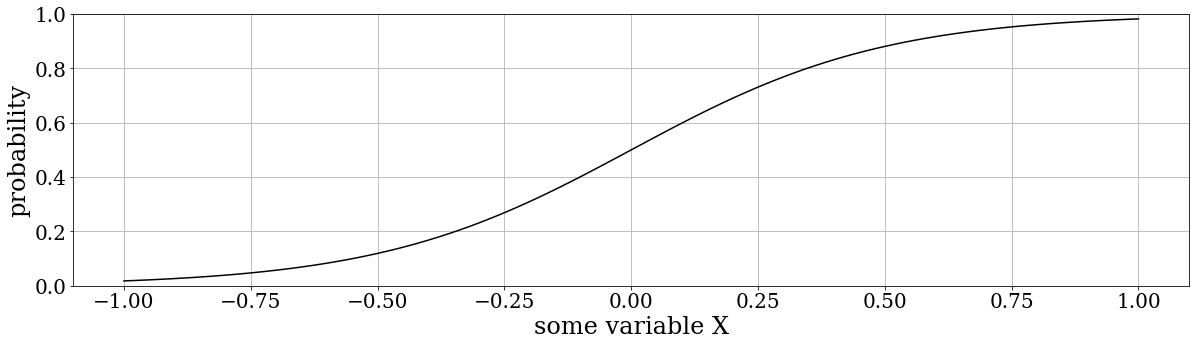

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
x = np.linspace(-1, 1, 101)
p = scipy.stats.logistic.cdf(slope * x + bias)
ax.plot(x, p, '-', color='black', alpha=1)
ax.set_xlabel("some variable X")
ax.set_ylabel("probability")
ax.grid()
ax.set_ylim((0,1));

In [4]:
n_traindata = 100
X = np.random.uniform(low=-1, high=1, size=n_traindata)
p = scipy.stats.logistic.cdf(X * slope + bias)
y = (p > np.random.uniform(size=n_traindata)).astype(int)

------

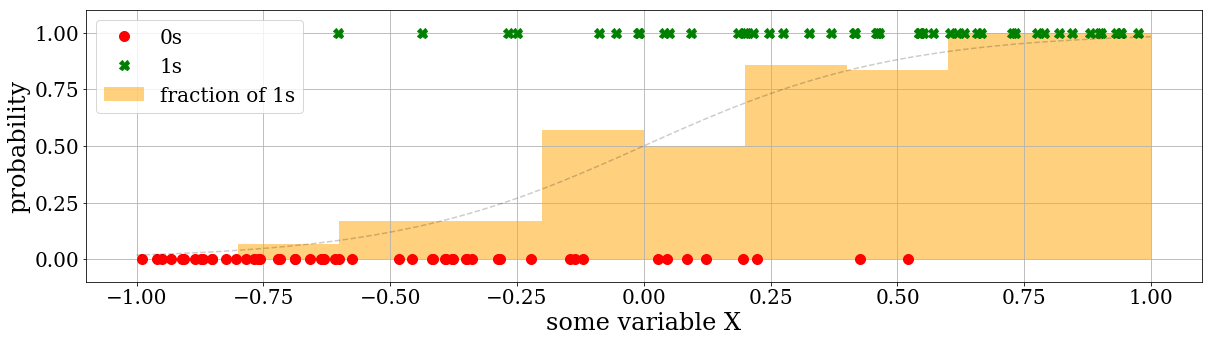

In [5]:
H, e = np.histogram(X, bins=10, range=(-1,1))
h, e = np.histogram(X[y==1], bins=10, range=(-1,1))
r = h/(H+1e-12)

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
x = np.linspace(-1, 1, 101)
p = scipy.stats.logistic.cdf(slope * x + bias)
ax.plot(X[y==0], y[y==0], 'o', color='red', markersize=10, label="0s")
ax.plot(X[y==1], y[y==1], 'X', color='green', markersize=10, label="1s")
ax.plot(x, p, '--', color='black', alpha=0.2)
ax.bar((e[:-1]+e[1:])/2., r, e[1]-e[0], color="orange", alpha=0.5, label="fraction of 1s")
ax.set_xlabel("some variable X")
ax.set_ylabel("probability")
ax.grid()
ax.legend()
ax.set_ylim((-0.1,1.1));

We fit a logistic regression to the dataset

In [6]:
model = errortools.LogisticRegression()
model.fit(X, y)
print(model.parameters)

[4.7 0.1]


---

[4.7 0.1]


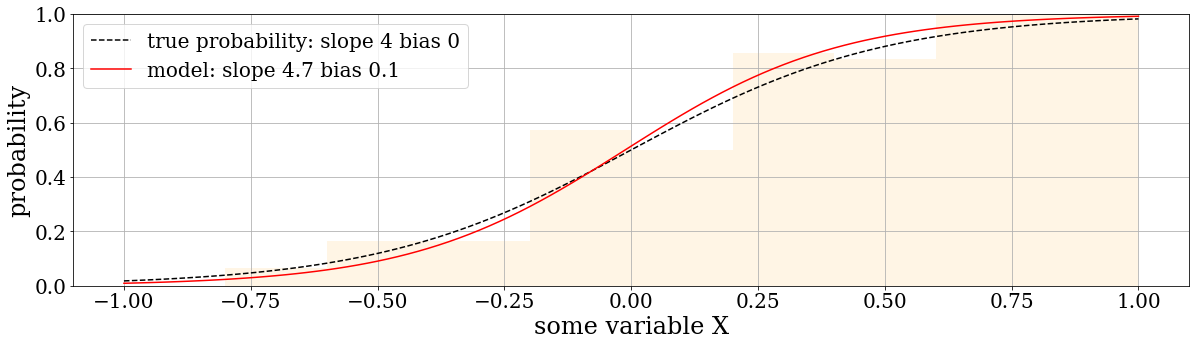

In [7]:
H, e = np.histogram(X, bins=10, range=(-1,1))
h, e = np.histogram(X[y==1], bins=10, range=(-1,1))
r = h/(H+1e-12)

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
x = np.linspace(-1, 1, 101)
p = scipy.stats.logistic.cdf(slope * x + bias)
f = model.predict(x)
ax.plot(x, p, '--', color='black', alpha=1, label="true probability: slope {:.0f} bias {:.0f}".format(slope, bias))
ax.bar((e[:-1]+e[1:])/2., r, e[1]-e[0], color="orange", alpha=0.1)
ax.plot(x, f, '-', color='red', alpha=1, label="model: slope {:.1f} bias {:.1f}".format(model.parameters[0], model.parameters[1]))
ax.set_xlabel("some variable X")
ax.set_ylabel("probability")
ax.grid()
ax.legend()
ax.set_ylim((0,1));

Our model does not get back the exact slope and bias that we put in  

The reason is the dataset  

If we had a different dataset, we would get different values

Let's illustrate this  
We repeat the example many times  

In [8]:
n_datasets = 1000
Xs = np.random.uniform(low=-1, high=1, size=(n_datasets, n_traindata))
ps = scipy.stats.logistic.cdf(Xs * slope + bias)
ys = (ps > np.random.uniform(size=Xs.shape)).astype(int)

In [9]:
models = []
for i in range(n_datasets):
    m = errortools.LogisticRegression()
    m.fit(Xs[i], ys[i])
    models.append(m)

[6.1 0.3]
[ 3.8 -0.3]
[ 4.6 -0.3]
[ 4.7 -0.1]
[ 3.3 -0.1]
[3.4 0.4]
[4.6 0.1]
[ 4.2 -0.5]
[ 4.2 -0. ]
[4.8 0.7]
[ 5.2 -0.2]
[4.4 0.3]
[ 3.  -0.1]
[ 4.1 -0.3]
[3.6 0.1]
[3.3 0.5]
[4.1 0.6]
[ 3.  -0.2]
[ 5.4 -0.4]
[4.5 0.5]
[3.2 0.3]
[ 3.9 -0.1]
[ 3.3 -0.4]
[3.7 0.1]
[ 4.4 -0.1]
[ 3.2 -0.1]
[ 4.9 -0.1]
[ 4.3 -0.8]
[ 4.5 -0.2]
[6.2 0.2]
[3.2 0.4]
[ 3.5 -0.4]
[4.4 0. ]
[ 4.4 -0.1]
[ 3.6 -0.4]
[ 3.2 -0.1]
[ 4.3 -0.2]
[ 3.3 -0.3]
[ 5.8 -0. ]
[ 4.1 -0.3]
[3.8 0.1]
[3.  0.1]
[3.4 0.2]
[4.6 0.4]
[3.7 0.1]
[4.4 0. ]
[3.2 0.1]
[ 4. -0.]
[ 4.2 -0.2]
[3.5 0.2]
[ 3.9 -0.3]
[ 4.5 -0.1]
[4.4 0.3]
[4.9 0.5]
[ 4.7 -0.7]
[3.5 0.1]
[ 5.1 -0.2]
[ 4.8 -0.1]
[6.1 0.2]
[ 4.3 -0. ]
[ 3.7 -0.1]
[ 5.7 -0.8]
[3.9 0. ]
[5.1 0. ]
[3.1 0.2]
[4.3 0.3]
[ 4.6 -0.3]
[5.  0.3]
[ 3.6 -0.2]
[4.1 0.3]
[4.7 0.6]
[ 3.3 -0.1]
[4.7 0.4]
[ 3.4 -0.2]
[ 5.4 -0.4]
[3.3 0.1]
[4.4 0.1]
[ 5.3 -0.3]
[ 4.  -0.3]
[ 3.9 -0.6]
[ 3.  -0.3]
[3.  0.2]
[6.4 0.2]
[ 3.8 -0.4]
[ 4.  -0.1]
[ 3.2 -0.1]
[4.7 0.5]
[3.6 0.6]
[ 4.5 -0.1]
[5.3 0.3]
[ 4.

[ 4.9 -0.2]
[4.  0.5]
[4.2 0.5]
[4.7 0.4]
[4.2 0.4]
[4.5 0.5]
[ 4.9 -0.1]
[3.7 0.1]
[ 4.9 -0.2]
[ 4.4 -0.5]
[4.6 0.1]
[2.9 0.6]
[ 3.8 -0.3]
[7.5 1.5]
[4.7 0.4]
[4.  0.3]
[3.7 0.3]
[ 5.7 -0.8]
[ 4.1 -0.6]
[ 2.6 -0. ]
[3.6 0.2]
[4.6 0.6]
[ 3.5 -0.2]
[ 4.4 -0.1]
[4.  0.5]
[ 3.4 -0.2]
[ 4.5 -0.1]
[4.9 0.2]
[4. 0.]
[ 4.2 -0.4]
[ 4.3 -0.1]
[ 3.9 -0.1]
[ 4.  -0.2]
[ 4.8 -0.2]
[5. 0.]
[4.7 0.2]
[ 3.9 -0.2]
[5.1 0.9]
[4.  0.2]
[ 4.4 -0.3]
[ 3.7 -0.1]
[ 4.9 -0. ]
[3.8 0.3]
[4.  0.2]
[ 4. -0.]
[ 2.7 -0.1]
[5.1 0.3]
[4.9 0.1]
[ 2.8 -0.1]
[3.7 0.1]
[4.9 0.2]
[3.2 0. ]
[ 3.9 -0.2]
[4.2 0.2]
[ 3.2 -0.1]
[4.1 0.4]
[ 4.8 -0.3]
[ 3.6 -0.2]
[ 4.  -0.4]
[ 3.8 -0.2]
[ 4.  -0.2]
[ 4.9 -0.5]
[ 5.3 -0.6]
[4.4 0.5]
[4.7 0.3]
[ 4.5 -0.3]
[4.3 0.1]
[ 4.6 -0.1]
[3.6 0.2]
[3.8 0.1]
[ 3.7 -0. ]
[ 4.1 -0.5]
[ 3.9 -0.5]
[ 3.5 -0. ]
[5.  0.5]
[5.1 0.4]
[4.1 0.7]
[5.  0.2]
[ 5.7 -0.7]
[5.7 0.2]
[4.9 0.1]
[ 3.5 -0. ]
[3.2 0.4]
[3.9 0. ]
[4.1 0.7]
[ 4.2 -0.1]
[3.8 0.6]
[ 4.4 -0.2]
[4.6 0.2]
[5.3 0.2]
[3.7 0.1]
[ 3.3 -0.3

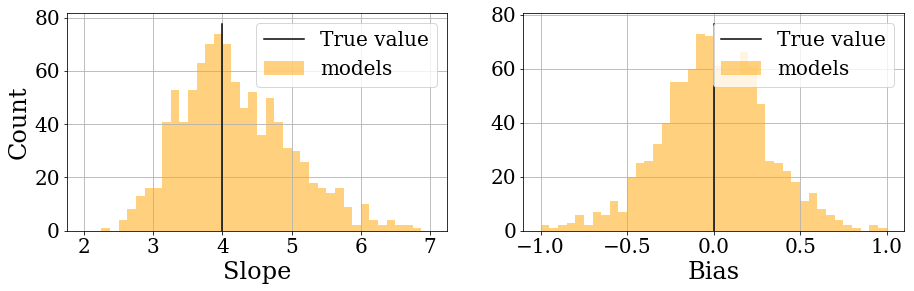

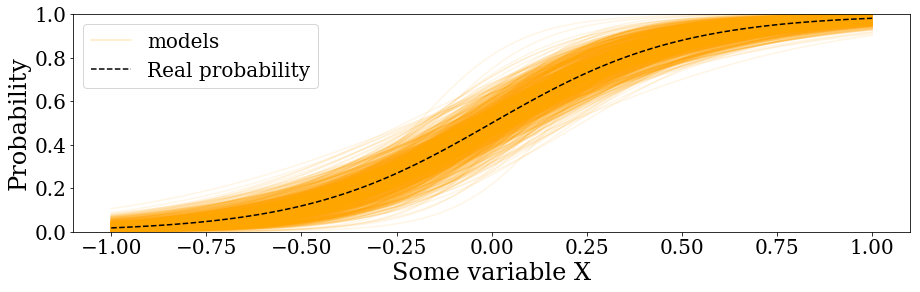

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))
ax[0].hist([m.parameters[0] for m in models], bins=40, range=(2,7), color='orange', alpha=0.5, label="models")
ax[0].plot((slope, slope), ax[0].get_ylim(), color='black', label="True value")
ax[0].grid()
ax[0].set_xlabel("Slope")
ax[0].set_ylabel("Count")
ax[0].legend()

ax[1].hist([m.parameters[1] for m in models], bins=40, range=(-1,1), color='orange', alpha=0.5, label="models")
ax[1].plot((bias, bias), ax[1].get_ylim(), color='black', label="True value")
ax[1].grid()
ax[1].set_xlabel("Bias")
ax[1].legend()

fig, ax = plt.subplots(1, 1, figsize=(15,4))
p = scipy.stats.logistic.cdf(slope * x + bias)
ax.plot(x, models[0].predict(x), '-', color='orange', alpha=0.25, label="models")
for m in models[1:]:
    ax.plot(x, m.predict(x), '-', color='orange', alpha=0.1)
ax.plot(x, p, '--', color='black', label="Real probability")
ax.set_ylim((0,1))
ax.set_xlabel("Some variable X")
ax.set_ylabel("Probability")
ax.legend();

### We see that

A model's parameters and prediction curves depend on the training data  

* And thereby also the AUC, confusion matrix, recall, precision, etc.  

We thus have an uncertainty on our predictions  

Can we somehow estimate these uncertainties?  


# Estimating uncertainties

Two steps

1. Estimate uncertainties on model parameters

2. Propagate uncertainties to predictions

## 1. Estimate uncertainties on model parameters

In many cases we minimize a loss function $L_{oss}(p; X, y)$  

__And implicitly maximise a likelihood__ $L(p|X,y)\sim e^{-L_{oss}(p; X, y)}$

The optimal model parameters
* minimize the loss function
* are the most likely parameters for the given dataset 

But surrounding parameter values are still likely  

---

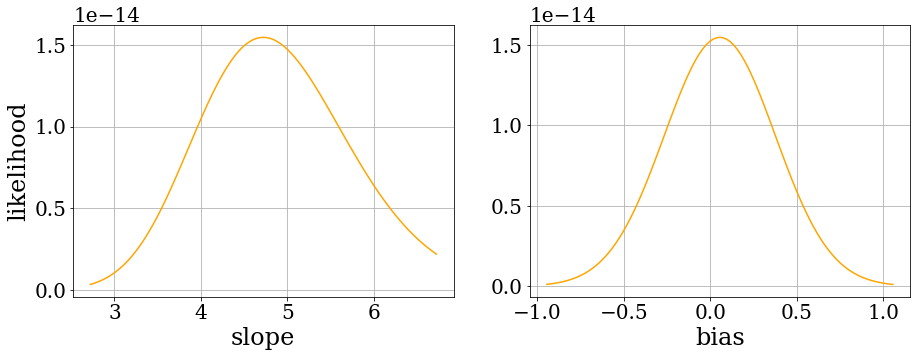

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

Z = np.concatenate((X[:, np.newaxis], np.ones((X.shape[0], 1))), axis=1)
f0 = model.negativeLogPosterior(model.parameters, Z, y, 0, 0)

p = np.tile(model.parameters, (101,1))
p[:, 0] += np.linspace(-2, 2, 101)
loss = np.exp( -np.array([model.negativeLogPosterior(q, Z, y, 0, 0) for q in p]) )

ax[0].plot(p[:, 0], loss, '-', color='orange')
ax[0].grid()
ax[0].set_xlabel("slope")
ax[0].set_ylabel("likelihood");

p = np.tile(model.parameters, (101,1))
p[:, 1] += np.linspace(-1, 1, 101)
loss = np.exp( -np.array([model.negativeLogPosterior(q, Z, y, 0, 0) for q in p]) )

ax[1].plot(p[:, 1], loss, '-', color='orange')
ax[1].grid()
ax[1].set_xlabel("bias");

We make a parabolic approximation of the loss function  
$L_{oss}(p; X, y)\approx L_{oss}(p_0) + \frac{1}{2}(p-p_0)\cdot\frac{\partial^2 L_{oss}}{\partial p^2}\cdot(p-p_0)$  

* This turns the likelihood into a multivariate Gaussian distribution  
* $L(p|X,y)\approx e^{-\frac{1}{2}(p-p_0)\cdot\frac{\partial^2 L_{oss}}{\partial p^2}\cdot(p-p_0)}$

---

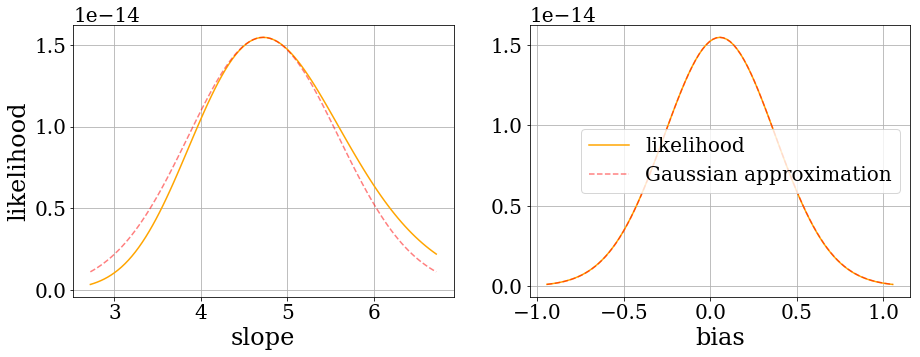

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

hessian = scipy.linalg.inv(model.cvr_mtx)
Z = np.concatenate((X[:, np.newaxis], np.ones((X.shape[0], 1))), axis=1)
f0 = model.negativeLogPosterior(model.parameters, Z, y, 0, 0)

p = np.tile(model.parameters, (101,1))
p[:, 0] += np.linspace(-model.errors[0], model.errors[0], 101)
approx = np.exp( -np.array([f0 + 0.5*np.dot(a-model.parameters, np.dot(hessian, a-model.parameters)) for a in p]) )

#ax[0].fill_between(x=p[:,0], y1=approx, color='red', hatch="x", alpha=0.05, label="86%")

p = np.tile(model.parameters, (101,1))
p[:, 0] += np.linspace(-2, 2, 101) 
loss = np.exp( -np.array([model.negativeLogPosterior(q, Z, y, 0, 0) for q in p]) )
approx = np.exp( -np.array([f0 + 0.5*np.dot(a-model.parameters, np.dot(hessian, a-model.parameters)) for a in p]) )

ax[0].plot(p[:, 0], loss, '-', color='orange', label="likelihood")
ax[0].plot(p[:, 0], approx, '--', color='red', label="Gaussian approximation", alpha=0.5)
ax[0].grid()
ax[0].set_xlabel("slope")
ax[0].set_ylabel("likelihood")

p = np.tile(model.parameters, (101,1))
p[:, 1] += np.linspace(-model.errors[1], model.errors[1], 101)
approx = np.exp( -np.array([f0 + 0.5*np.dot(a-model.parameters, np.dot(hessian, a-model.parameters)) for a in p]) )

#ax[1].fill_between(x=p[:,1], y1=approx, color='red', hatch="x", alpha=0.05, label="68%")

p = np.tile(model.parameters, (101,1))
p[:, 1] += np.linspace(-1, 1, 101)
loss = np.exp( -np.array([model.negativeLogPosterior(q, Z, y, 0, 0) for q in p]) )
approx = np.exp( -np.array([f0 + 0.5*np.dot(a-model.parameters, np.dot(hessian, a-model.parameters)) for a in p]) )

ax[1].plot(p[:, 1], loss, '-', color='orange', label="likelihood")
ax[1].plot(p[:, 1], approx, '--', color='red', label="Gaussian approximation", alpha=0.5)
ax[1].grid()
ax[1].legend()
ax[1].set_xlabel("bias");

The approximation automatically gives us the parameter errors.
They are given by the covariance matrix  
$\hat{\Sigma}_{p} = \left[\frac{\partial^2 L_{oss}}{\partial p^2}\right]^{-1}$  

* Diagonal elements give the parameter errors
* Off-diagonal elements give the parameter correlations

------

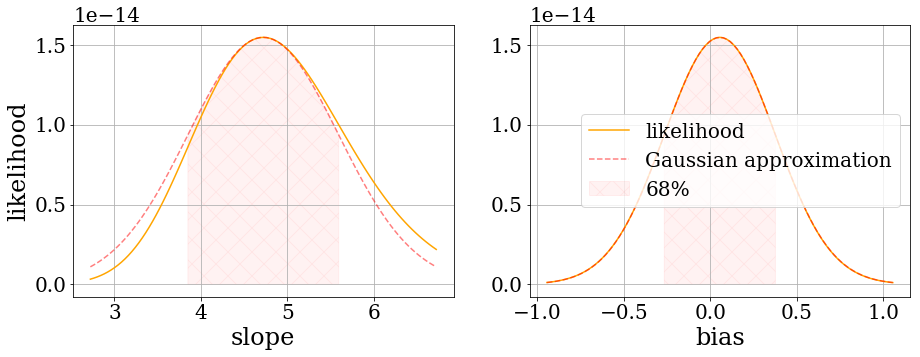

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

hessian = scipy.linalg.inv(model.cvr_mtx)
Z = np.concatenate((X[:, np.newaxis], np.ones((X.shape[0], 1))), axis=1)
f0 = model.negativeLogPosterior(model.parameters, Z, y, 0, 0)

p = np.tile(model.parameters, (101,1))
p[:, 0] += np.linspace(-model.errors[0], model.errors[0], 101)
approx = np.exp( -np.array([f0 + 0.5*np.dot(a-model.parameters, np.dot(hessian, a-model.parameters)) for a in p]) )

ax[0].fill_between(x=p[:,0], y1=approx, color='red', hatch="x", alpha=0.05, label="68%")

p = np.tile(model.parameters, (101,1))
p[:, 0] += np.linspace(-2, 2, 101) 
loss = np.exp( -np.array([model.negativeLogPosterior(q, Z, y, 0, 0) for q in p]) )
approx = np.exp( -np.array([f0 + 0.5*np.dot(a-model.parameters, np.dot(hessian, a-model.parameters)) for a in p]) )

ax[0].plot(p[:, 0], loss, '-', color='orange', label="likelihood")
ax[0].plot(p[:, 0], approx, '--', color='red', label="Gaussian approximation", alpha=0.5)
ax[0].grid()
ax[0].set_xlabel("slope")
ax[0].set_ylabel("likelihood")

p = np.tile(model.parameters, (101,1))
p[:, 1] += np.linspace(-model.errors[1], model.errors[1], 101)
approx = np.exp( -np.array([f0 + 0.5*np.dot(a-model.parameters, np.dot(hessian, a-model.parameters)) for a in p]) )

ax[1].fill_between(x=p[:,1], y1=approx, color='red', hatch="x", alpha=0.05, label="68%")

p = np.tile(model.parameters, (101,1))
p[:, 1] += np.linspace(-1, 1, 101)
loss = np.exp( -np.array([model.negativeLogPosterior(q, Z, y, 0, 0) for q in p]) )
approx = np.exp( -np.array([f0 + 0.5*np.dot(a-model.parameters, np.dot(hessian, a-model.parameters)) for a in p]) )

ax[1].plot(p[:, 1], loss, '-', color='orange', label="likelihood")
ax[1].plot(p[:, 1], approx, '--', color='red', label="Gaussian approximation", alpha=0.5)
ax[1].grid()
ax[1].legend()
ax[1].set_xlabel("bias");

The _Minuit_ minimisation package automatically calculates the parameter covariance matrix  
* _Minuit_ is a robust, age tested minimisation package, used extensively in particle physics
* It is available in Python through the `iminuit` package
* We use `iminuit` where possible for its robustness and its covariance matrix calculation

## 2. Propagate uncertainties to predictions

A prediction is a function of input features $X$ and model parameters $p$  
 * $f(X|p) = \frac{1}{1+e^{-X\cdot p}}$  
 
The most likely model parameters $p_0$ determine the prediction  

And the uncertainties in the parameters propagate to an uncertainty in the prediction 
* Multiple ways to propagate uncertainties

**Linear error propagation**  
   * Linear approximation of the prediction function
       * $f(X|p)\approx f(X|p_0)+\frac{\partial f}{\partial p}(X|p_0)\cdot(p-p_0)$
   * Makes the prediction uncertainty a simple equation
       * $\Delta f \approx  \sqrt{\frac{\partial f}{\partial p}(X|p_0) \cdot \hat{\Sigma}_p \cdot \frac{\partial f}{\partial p}(X|p_0)}$  
       
Fast calculation, but may be inexact    

**Sample the Gaussian likelihood**  
* Take random parameters $p$ from $L(p|X,y)\approx e^{-\frac{1}{2}(p-p_0)\cdot\hat{\Sigma}_{p}^{-1}\cdot(p-p_0)}$ 
* Calculate $E_p\left[ \left(f(X|p)-f(X|p_0)\right)^2 \right]$  

Slower, but more exact with more samples

------

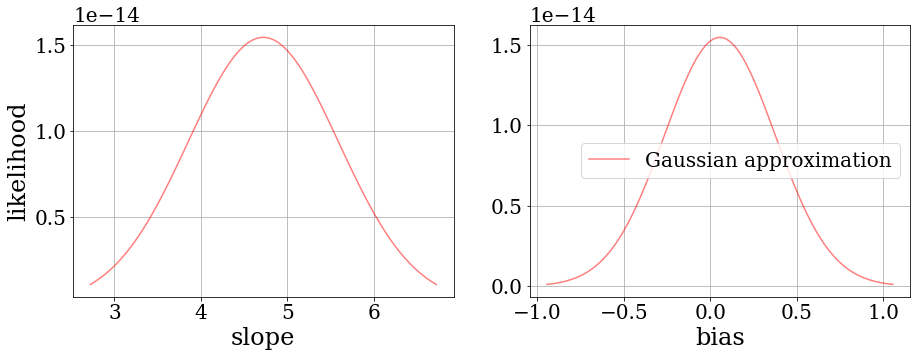

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

hessian = scipy.linalg.inv(model.cvr_mtx)
Z = np.concatenate((X[:, np.newaxis], np.ones((X.shape[0], 1))), axis=1)
f0 = model.negativeLogPosterior(model.parameters, Z, y, 0, 0)

p = np.tile(model.parameters, (101,1))
p[:, 0] += np.linspace(-model.errors[0], model.errors[0], 101)
approx = np.exp( -np.array([f0 + 0.5*np.dot(a-model.parameters, np.dot(hessian, a-model.parameters)) for a in p]) )

#ax[0].fill_between(x=p[:,0], y1=approx, color='red', hatch="x", alpha=0.05, label="86%")

p = np.tile(model.parameters, (101,1))
p[:, 0] += np.linspace(-2, 2, 101) 
loss = np.exp( -np.array([model.negativeLogPosterior(q, Z, y, 0, 0) for q in p]) )
approx = np.exp( -np.array([f0 + 0.5*np.dot(a-model.parameters, np.dot(hessian, a-model.parameters)) for a in p]) )

#ax[0].plot(p[:, 0], loss, '-', color='orange', label="likelihood")
ax[0].plot(p[:, 0], approx, '-', color='red', label="Gaussian approximation", alpha=0.5)
ax[0].grid()
ax[0].set_xlabel("slope")
ax[0].set_ylabel("likelihood")

p = np.tile(model.parameters, (101,1))
p[:, 1] += np.linspace(-model.errors[1], model.errors[1], 101)
approx = np.exp( -np.array([f0 + 0.5*np.dot(a-model.parameters, np.dot(hessian, a-model.parameters)) for a in p]) )

#ax[1].fill_between(x=p[:,1], y1=approx, color='red', hatch="x", alpha=0.05, label="68%")

p = np.tile(model.parameters, (101,1))
p[:, 1] += np.linspace(-1, 1, 101)
loss = np.exp( -np.array([model.negativeLogPosterior(q, Z, y, 0, 0) for q in p]) )
approx = np.exp( -np.array([f0 + 0.5*np.dot(a-model.parameters, np.dot(hessian, a-model.parameters)) for a in p]) )

#ax[1].plot(p[:, 1], loss, '-', color='orange', label="likelihood")
ax[1].plot(p[:, 1], approx, '-', color='red', label="Gaussian approximation", alpha=0.5)
ax[1].grid()
ax[1].legend()
ax[1].set_xlabel("bias");

# Uncertainties in action

Surviving the Titanic

Get information on Titanic passengers

In [15]:
df = pd.read_csv("http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")

Do some data mangling

In [16]:
df['sex'] = df.Sex.apply(lambda s: 1 if s=='female' else 0)
df['has siblings or spouses aboard'] = (df['Siblings/Spouses Aboard'] > 0).astype(int)
df['has parents or children aboard'] = (df['Parents/Children Aboard'] > 0).astype(int)
df['has family aboard'] = (df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard'] > 0).astype(int)

In [17]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,sex,has siblings or spouses aboard,has parents or children aboard,has family aboard
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,0,1,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1,1,0,1
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1,0,0,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1,1,0,1
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0,0,0,0


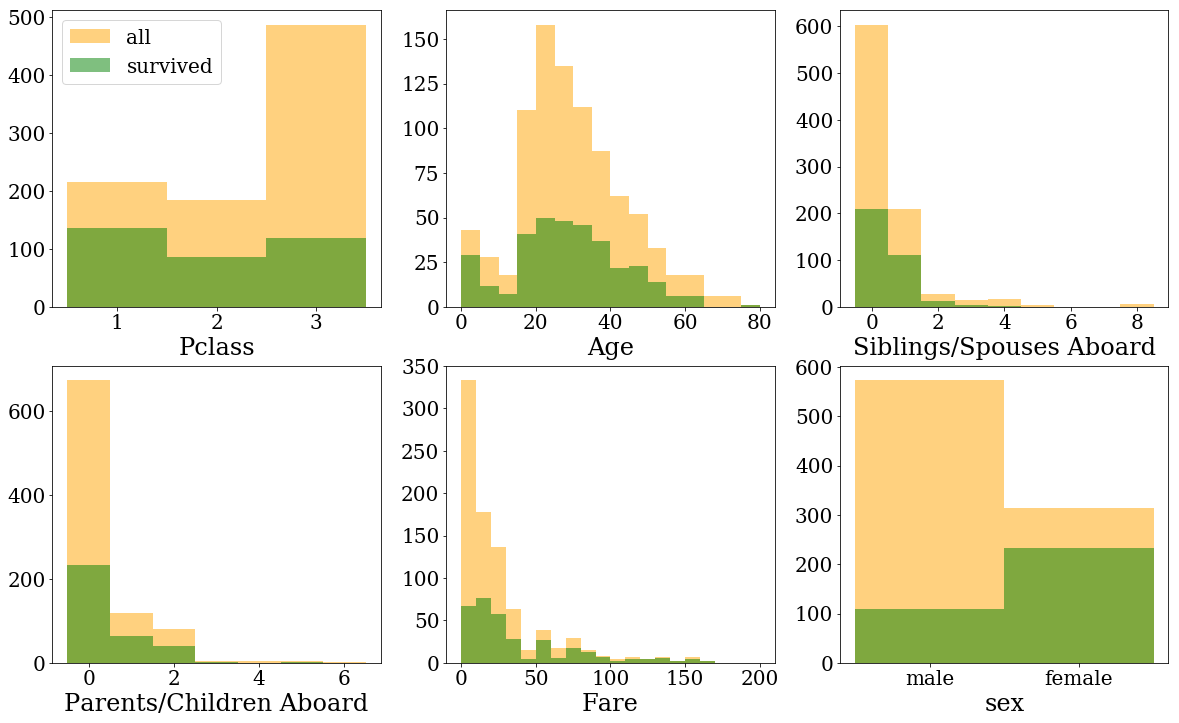

In [18]:
dfsurv = df[df.Survived==1]
dfdied = df[df.Survived==0]
fig, ax = plt.subplots(2, 3, figsize=(20, 12))
ax[0,0].hist(df.Pclass, bins=3, range=(0.5,3.5), color='orange', alpha=0.5, label="all")
ax[0,0].hist(dfsurv.Pclass, bins=3, range=(0.5,3.5), color='green', alpha=0.5, label="survived")
ax[0,0].set_xlabel("Pclass")
ax[0,0].legend()

ax[0,1].hist(df.Age, bins=16, range=(0,80), color='orange', alpha=0.5, label="all")
ax[0,1].hist(dfsurv.Age, bins=16, range=(0,80), color='green', alpha=0.5, label="survived")
ax[0,1].set_xlabel("Age")

ax[0,2].hist(df['Siblings/Spouses Aboard'], bins=9, range=(-0.5,8.5), color='orange', alpha=0.5, label="all")
ax[0,2].hist(dfsurv['Siblings/Spouses Aboard'], bins=9, range=(-0.5,8.5), color='green', alpha=0.5, label="survived")
ax[0,2].set_xlabel("Siblings/Spouses Aboard")

ax[1,0].hist(df['Parents/Children Aboard'], bins=7, range=(-0.5,6.5), color='orange', alpha=0.5, label="all")
ax[1,0].hist(dfsurv['Parents/Children Aboard'], bins=7, range=(-0.5,6.5), color='green', alpha=0.5, label="survived")
ax[1,0].set_xlabel("Parents/Children Aboard")

ax[1,1].hist(df['Fare'], bins=20, range=(0,200), color='orange', alpha=0.5, label="all")
ax[1,1].hist(dfsurv['Fare'], bins=20, range=(0,200), color='green', alpha=0.5, label="survived")
ax[1,1].set_xlabel("Fare")

ax[1,2].hist(df['sex'], bins=2, range=(-0.5,1.5), color='orange', alpha=0.5, label="all")
ax[1,2].hist(dfsurv['sex'], bins=2, range=(-0.5,1.5), color='green', alpha=0.5, label="survived")
ax[1,2].set_xlabel("sex")
ax[1,2].get_xaxis().set_ticks([0,1])
ax[1,2].get_xaxis().set_ticklabels(['male', 'female']);

In [19]:
df_train = df.sample(frac=0.5, replace=False, random_state=42)
df_test  = df.loc[df.index.difference(df_train.index)]

In [20]:
features = ['Pclass', 'Age', 'Fare', 'Siblings/Spouses Aboard', 
            'Parents/Children Aboard', 'sex']
target = 'Survived'

In [21]:
X_train = df_train[features].values
y_train = df_train[target].values

In [22]:
X_test = df_test[features].values
y_test = df_test[target].values

In [23]:
titanic_model = errortools.LogisticRegression(fit_intercept=True)
titanic_model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/errortools-0.1.0-py3.6.egg/errortools/logistic_regression.py:79: RuntimeWarning: overflow encountered in exp


In [24]:
titanic_model.minuit.print_fmin()

FCN = 206.24942561609373 
 TOTAL NCALL = 258 
 NCALLS = 181 
 
 
 EDM = 2.104307705749105e-06 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,x0,-0.959987,0.217055,,,,,No
1,x1,-0.0469218,0.0110904,,,,,No
2,x2,0.0108253,0.00628662,,,,,No
3,x3,-0.313577,0.15234,,,,,No
4,x4,-0.102128,0.168531,,,,,No
5,x5,2.55019,0.276069,,,,,No
6,x6,2.12152,0.760964,,,,,No


In [25]:
titanic_model.minuit.print_matrix()

+,x0,x1,x2,x3,x4,x5,x6
x0,1.00,0.42,0.58,-0.05,-0.15,-0.21,-0.90
x1,0.42,1.00,-0.03,0.26,0.08,-0.19,-0.70
x2,0.58,-0.03,1.00,-0.22,-0.29,0.01,-0.52
x3,-0.05,0.26,-0.22,1.00,-0.24,-0.15,-0.09
x4,-0.15,0.08,-0.29,-0.24,1.00,-0.18,0.08
x5,-0.21,-0.19,0.01,-0.15,-0.18,1.00,0.12
x6,-0.90,-0.70,-0.52,-0.09,0.08,0.12,1.00


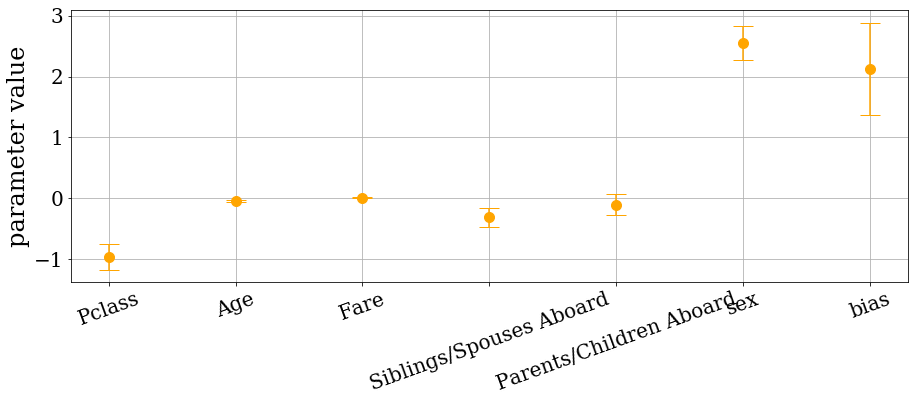

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.errorbar(x=np.arange(len(features)), y=titanic_model.parameters[:-1], 
            yerr=titanic_model.errors[:-1], fmt='o', color='orange', capsize=10, markersize=10)
ax.grid()
ax.set_ylabel("parameter value")
plt.xticks(np.arange(len(features)), features, rotation=20);

In [27]:
scaler = sklearn.preprocessing.MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
titanic_model.fit(X_train_scaled, y_train)

[-1.9 -3.2  5.6 -2.5 -0.6  2.5  1.1]


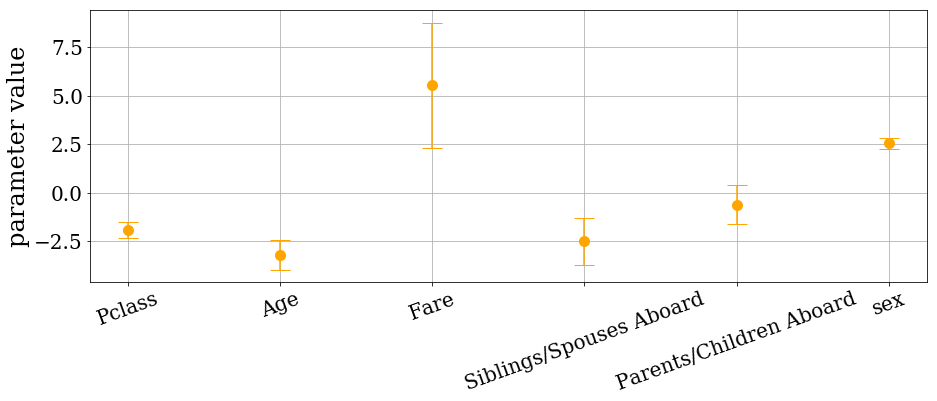

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.errorbar(x=np.arange(len(features)), y=titanic_model.parameters[:-1], 
            yerr=titanic_model.errors[:-1], fmt='o', color='orange', capsize=10, markersize=10)
ax.grid()
ax.set_ylabel("parameter value")
plt.xticks(np.arange(len(features)), features, rotation=20);

In [45]:
scores_test = titanic_model.predict(X_test_scaled)

[-1.9 -3.2  5.5 -2.5 -0.6  2.6  1.1]


In [46]:
errors_test_down, errors_test_up = titanic_model.estimate_errors(X_test_scaled)

[-1.9 -3.2  5.5 -2.5 -0.6  2.6  1.1]


Text(0,0.5,'survival score')

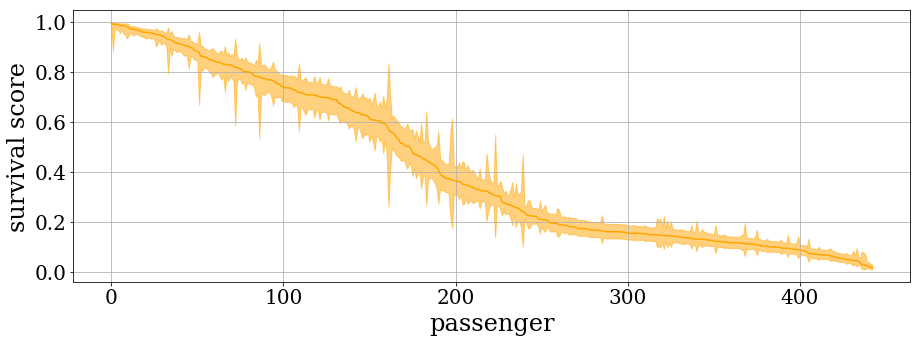

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
order = np.argsort(scores_test)[::-1]
ax.plot(np.arange(len(scores_test)), scores_test[order], '-', color='orange')
ax.fill_between(x=np.arange(len(scores_test)), y1=(scores_test-errors_test_down)[order], 
                y2=(scores_test+errors_test_up)[order], color='orange', alpha=0.5)
ax.grid()
ax.set_xlabel("passenger")
ax.set_ylabel("survival score")

In [290]:
# Helper function to calculate the postive ratio and its error
def get_positive_ratio(model, X, y, n_samples=10000, bins=20):
    y_pred = model.predict(X)
    H_all, e = np.histogram(y_pred, bins=bins, range=(0,1))
    H_pos, e = np.histogram(y_pred[y==1], bins=bins, range=(0,1))
    ratio = H_pos.astype(float)/(H_all+1e-12)
    
    p_samples = np.random.multivariate_normal(mean=model.parameters, cov=model.cvr_mtx, size=n_samples)
    y_pred_samples = 1./(1.+np.exp(-np.dot(p_samples, np.concatenate((X,np.ones((X.shape[0],1))), axis=1).T)))
    H_all_samples = np.array([np.histogram(v, bins=bins, range=(0,1))[0] for v in y_pred_samples])
    H_pos_samples = np.array([np.histogram(v[y==1], bins=bins, range=(0,1))[0] for v in y_pred_samples])
    sampled_ratios = H_pos_samples.astype(float)/(H_all_samples+1e-12)
    err = np.sqrt(np.mean((sampled_ratios-ratio[np.newaxis,:])**2, axis=0) + ratio/(H_all+1e-12))
    return ratio, err, (e[:-1]+e[1:])/2

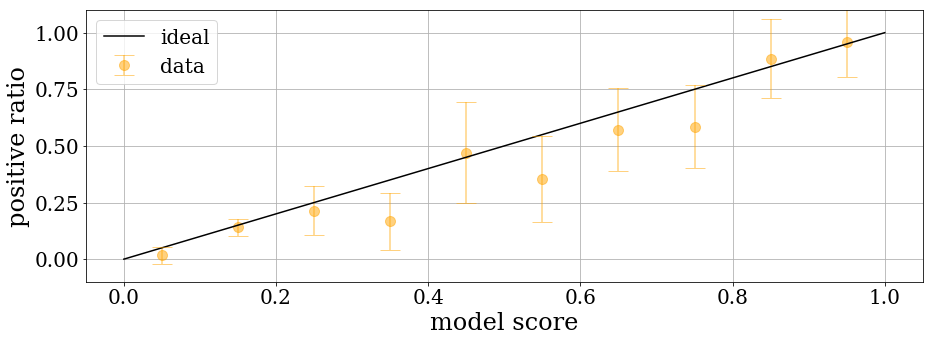

In [291]:
ratio, err, e = get_positive_ratio(titanic_model, X_test, y_test, 10000, 10)

fig, ax = plt.subplots(1, 1, figsize=(15,5))

ax.plot([0,1], [0,1], '-', color='black', label="ideal")
ax.errorbar(x=e, y=ratio, yerr=err, fmt='o', color='orange', alpha=0.5, markersize=10, barsabove=True, capsize=10, label='data')
ax.grid()
ax.set_xlabel("model score")
ax.set_ylabel("positive ratio")
ax.legend()
ax.set_ylim((-0.1,1.1));

In [283]:
len(df_train), len(df_test)

(444, 443)